In [209]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Load in Dataframes
## Summary
##### go_df

Contains: go terms, is_a relationships, part_of relationships, regulates relationships, aspect, is_a count, part_of count, & regulates count


##### proteins_df

Contains: protein ID, protein description, protein sequence, taxonomy ID, protein sequence length, go term counts per protein, & counts of unique amino acids, & aspect proportions (BPO, CCO, and MFO)


##### terms_df

Contains: protein ID, go term, and aspect

In [210]:
go_df = joblib.load('../data/flow_output/processed_go.pkl')
proteins_df = joblib.load('../data/flow_output/protein.pkl')
terms_df = pd.read_csv('../data/cafa-5-protein-function-prediction/Train/train_terms.tsv',sep="\t")

In [211]:
go_df.head(2)

,term,is_a,part_of,regulates,aspect,is_a_count,part_of_count,regulates_count
16843,GO:0000001,"[GO:0048308, GO:0048311]",N/A,N/A,BPO,2,0,0
5764,GO:0000002,[GO:0007005],N/A,N/A,BPO,1,0,0


In [212]:
proteins_df.head(2)

,EntryID,description,sequence,taxonomyID,sequence_length,term_count,amino_count,BPO_prop,CCO_prop,MFO_prop
0,P20536,P20536 sp|P20536|UNG_VACCC Uracil-DNA glycosyl...,"(M, N, S, V, T, V, S, H, A, P, Y, T, I, T, Y, ...",10249,218,33,20,0.909091,0.000000,0.090909
1,O73864,O73864 sp|O73864|WNT11_DANRE Protein Wnt-11 OS...,"(M, T, E, Y, R, N, F, L, L, L, F, I, T, S, L, ...",7955,354,170,20,0.941176,0.029412,0.029412


In [213]:
terms_df.head(2)

,EntryID,term,aspect
0,A0A009IHW8,GO:0008152,BPO
1,A0A009IHW8,GO:0034655,BPO


# Univariate Exploration

Questions:
- What are the most common gene ontologies associated with proteins?
- What is the subontology distribution for gene ontologies? ...for the top 15 most common gene ontologies?
- What is the distribution of is_a_count for gene ontologies? ...for the top 15 most common gene ontologies?
- What is the distribution of part_of_count for gene ontologies? ...for the top 15 most common gene ontologies?
- What is the distribution of regulates_count for gene ontologies? ...for the top 15 most common gene ontologies?
- What are the most common protein IDs?
- What is the distribution of protein sequence length?
- What is the distribution of gene ontologies counts for proteins?
- What is the distribution of amino counts for proteins?

##### What are the most common gene ontologies associated with proteins?

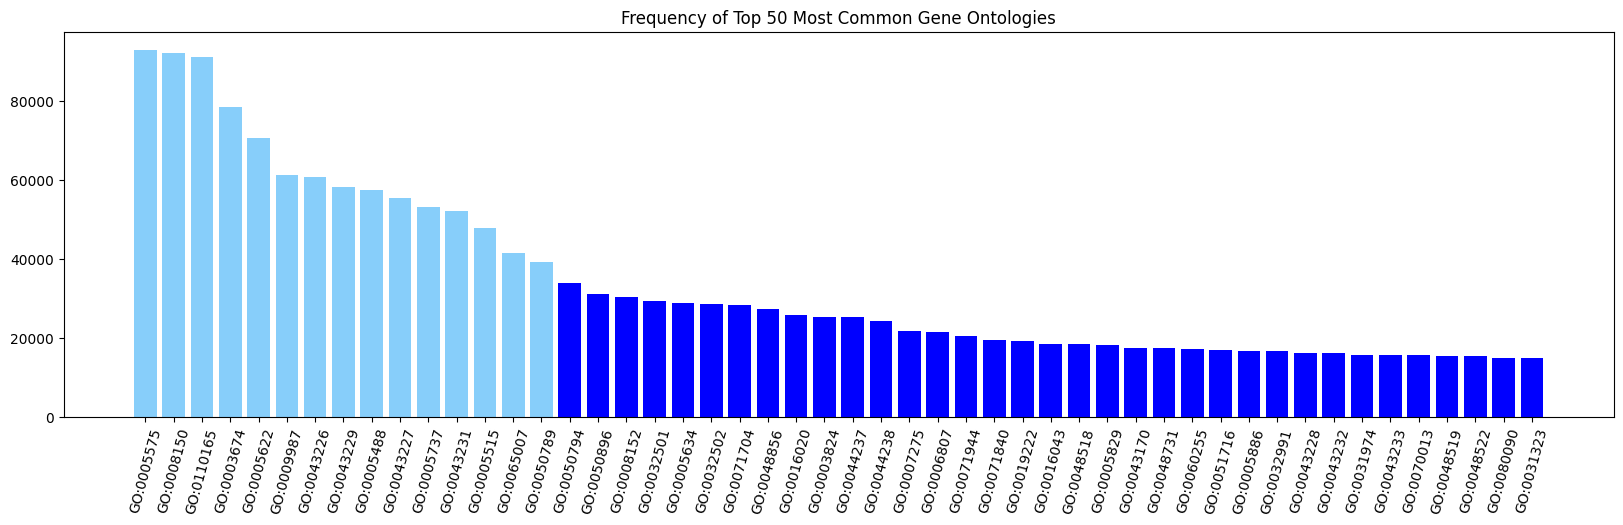

In [270]:
#get top 50 most common GO-terms
common_go = terms_df.term.value_counts().head(50);
common_go_terms = common_go.index

#barchart of top 50 most common gene ontologies
plt.figure(figsize=[20,5]);
common_bars = plt.bar(x=common_go_terms[0:15], height=common_go.values[0:15], color='lightskyblue');
less_common_bars = plt.bar(x=common_go_terms[15:], height=common_go.values[15:], color='blue')
plt.xticks(rotation=75);
plt.title('Frequency of Top 50 Most Common Gene Ontologies');

In [278]:
terms_df.nunique()

EntryID    142246
term        31466
aspect          3
dtype: int64

In [254]:
# get frequency of 1st most common go_term,
#     frequency of 15th most common go_term, &
#     proportion of data that these go_terms make up
print(common_go.values[0])
print(common_go.values[15])
print(common_go.values[0:15].sum()/terms_df.shape[0])

92912
33888
0.17771967703127392


In [348]:
# find how many go's account for next 18% of data
go_descending = terms_df.term.value_counts();
go_descending.values[0:68].sum()/terms_df.shape[0]

0.3598330158693464

There are a clear top 5 gene ontologies, but there is also a natural break at the top 15 most common gene ontologies (as seen in light blue).
Each of the top 15 gene ontologies are associated with anywhere from ~34,000 - 93,000 out of 142246 proteins. Collectively, these top 15 gene ontologies are associated with 18% of the protein/gene ontology relationships. For relative measure, it takes the next 53 gene ontologies to account for the next 18% of the data! 

##### What is the subontology distribution for gene ontologies? What is the subontology distribution for the top 15 most common gene ontologies?

In [229]:
# get go_df with top 15 common go terms
common_go_df = go_df[go_df.term.isin(common_go_terms[0:15])]

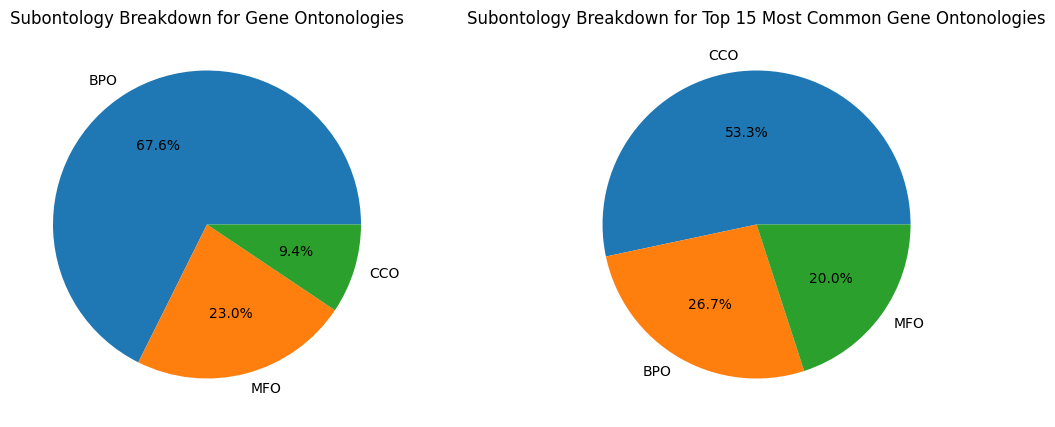

In [236]:
plt.figure(figsize = [13,5])
plt.subplot(1, 2, 1)
data = go_df.aspect.value_counts(normalize=True)
plt.pie(data, autopct='%1.1f%%', labels=data.index);
plt.title('Subontology Breakdown for Gene Ontonologies');

plt.subplot(1, 2, 2)
data = common_go_df.aspect.value_counts(normalize=True)
plt.pie(data, autopct='%1.1f%%', labels=data.index);
plt.title('Subontology Breakdown for Top 15 Most Common Gene Ontonologies');

In [354]:
go_df.head()

,term,is_a,part_of,regulates,aspect,is_a_count,part_of_count,regulates_count
16843,GO:0000001,"[GO:0048308, GO:0048311]",N/A,N/A,BPO,2,0,0
5764,GO:0000002,[GO:0007005],N/A,N/A,BPO,1,0,0
512,GO:0000003,[GO:0008150],N/A,N/A,BPO,1,0,0
28165,GO:0000006,[GO:0005385],N/A,N/A,MFO,1,0,0
30392,GO:0000007,[GO:0005385],N/A,N/A,MFO,1,0,0


In [360]:
# sample 3 random gene ontolgoies with BPO as the subontology
go_df.query('aspect == "BPO"').sample(n=3, random_state=1)

,term,is_a,part_of,regulates,aspect,is_a_count,part_of_count,regulates_count
13479,GO:1900115,[GO:0009966],N/A,N/A,BPO,1,0,0
18659,GO:1902167,"[GO:1902165, GO:1902231, GO:1902255]",{None},{GO:0042771},BPO,3,0,1
5793,GO:2000382,"[GO:0051094, GO:2000380]",{None},{GO:0007498},BPO,2,0,1


In [361]:
# sample 3 random gene ontolgoies with MFO as the subontology
go_df.query('aspect == "MFO"').sample(n=3, random_state=1)

,term,is_a,part_of,regulates,aspect,is_a_count,part_of_count,regulates_count
30164,GO:0047979,[GO:0016899],N/A,N/A,MFO,1,0,0
27440,GO:0009019,[GO:0016423],N/A,N/A,MFO,1,0,0
27236,GO:0000403,[GO:0000217],N/A,N/A,MFO,1,0,0


**BPO (Biological Process Ontology)** is by far the the most common subonotology, making up 67.6% of the gene ontologies. A few examples of gene ontologies with BPO as the subontology are:
> - **GO:1900115** Any regulation of signal transduction that takes place in the extracellular region.
> - **GO:1902167** Any process that activates or increases the frequency, rate or extent of intrinsic apoptotic signaling pathway in response to DNA damage by p53 class mediator.
> - **GO:2000382** Any process that activates or increases the frequency, rate or extent of mesoderm development.

Next is **MFO (Molecular Functions Ontology)** making up 23% of the gene ontologies. A few examples of gene ontologies with MFO as the subontology are:
> - **GO:0047979** Catalysis of the reaction: hexose + O2 = aldono-1,5-lactone + H202.
> - **GO:0009019** Catalysis of the reaction: S-adenosyl-L-methionine + tRNA = S-adenosyl-L-homocysteine + tRNA containing N1-methylguanine.
> - **GO:0000403** Binding to a DNA segment shaped like a Y. This shape occurs when DNA contains a region of paired double-stranded DNA on one end and a region of unpaired DNA strands on the opposite end.

Last is **CCO (Cellular Components Ontology)** making up a measly 6% of the gene ontologies. Finally, a few examples of gene ontologies with MFO as the subontology are:
> - **GO:0030134** A vesicle with a coat formed of the COPII coat complex proteins. The COPII coat complex is formed by the Sec23p/Sec24p and the Sec13p/Sec31p heterodimers. COPII-associated vesicles transport proteins from the rough endoplasmic reticulum to the Golgi apparatus (anterograde transport).
> - **GO:0032133** A eukaryotically conserved protein complex that localizes to kinetochores in early mitosis, the spindle mid-zone in anaphase B and to the telophase midbody. It has been proposed that the passenger complex coordinates various events based on its location to different structures during the course of mitosis. Complex members include the BIR-domain-containing protein Survivin, Aurora kinase, INCENP and Borealin.
> - **GO:0033652** A chlorophyll-containing plastid as found within host cells with thylakoids organized into grana and frets, or stroma thylakoids, and embedded in a stroma. The host is defined as the larger of the organisms involved in a symbiotic interaction.

Interestingly, when you look at just the top 15 most common gene ontologies, the subontology breakdown for BPO and CCO dratically changes. BPO drops 40% and CCO goes from being in only 6% of the data to half of the gene ontologies.

##### What is the distribution of is_a_count for gene ontologies? What is the distribution of is_a_count for the top 15 most common gene ontologies?

In [192]:
def plt_count_bar(df, rel):
    col = rel+'_count'
    data = df[col].value_counts().sort_index(ascending=True)
    plt.bar(x=data.index, height=data.values);
    plt.ylabel('Frequency');
    plt.xlabel('Gene Ontology "{}" Counts'.format(rel));
    plt.xticks(np.arange(data.index.max()+1));
    plt.title('Distribution of "{}" Counts for Gene Ontologies'.format(rel));

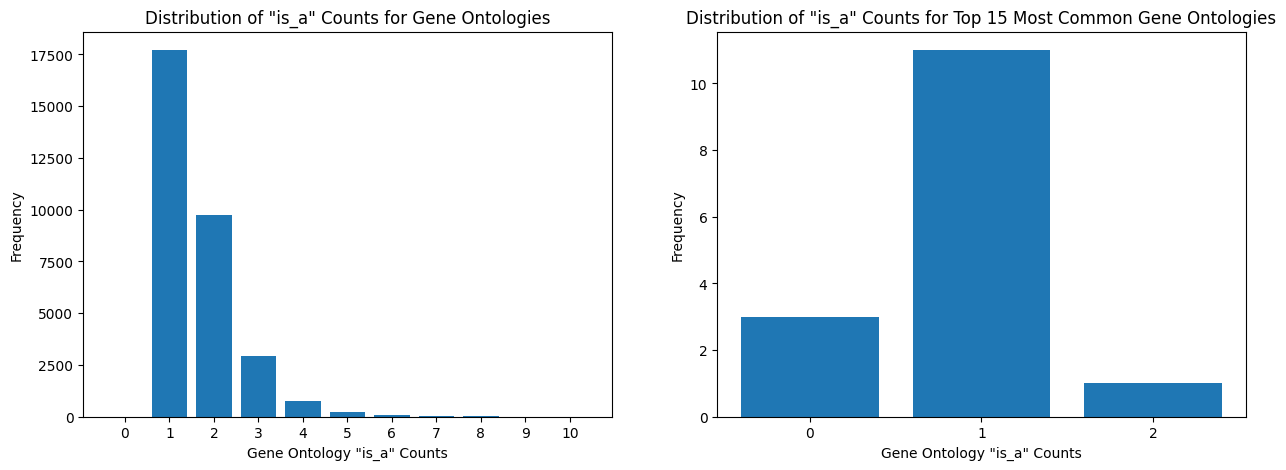

In [330]:
plt.figure(figsize = [15,5])
plt.subplot(1, 2, 1)
plt_count_bar(go_df, 'is_a')
#plt.yscale('log');
#plt.yticks([1, 10, 100, 1000, 10000], [1, 10, 100, 1000, 10000]);
#plt.ylabel('Frequency (log scale)');

plt.subplot(1, 2, 2)
plt_count_bar(common_go_df, 'is_a')
plt.title('Distribution of "is_a" Counts for Top 15 Most Common Gene Ontologies');

Gene ontologies look to have anywhere from 0-10 is_a relationships with other gene ontologies.
The distribution of gene ontology is_a counts is right skewed. The highest frequency at 1 is_a relationship, almost double any other is_a count.
There are very few gene ontologies with 0 & 4-10 is_a relationships.

When looking at the top 15 most common gene ontologies, they only have 0-2 is_a relationships. Unsurprisingly, the majority of them have 1 is_a relationship.

##### What is the distribution of part_of_counts for gene ontologies? What is the distribution of part_of_counts for the top 15 most common gene ontologies?

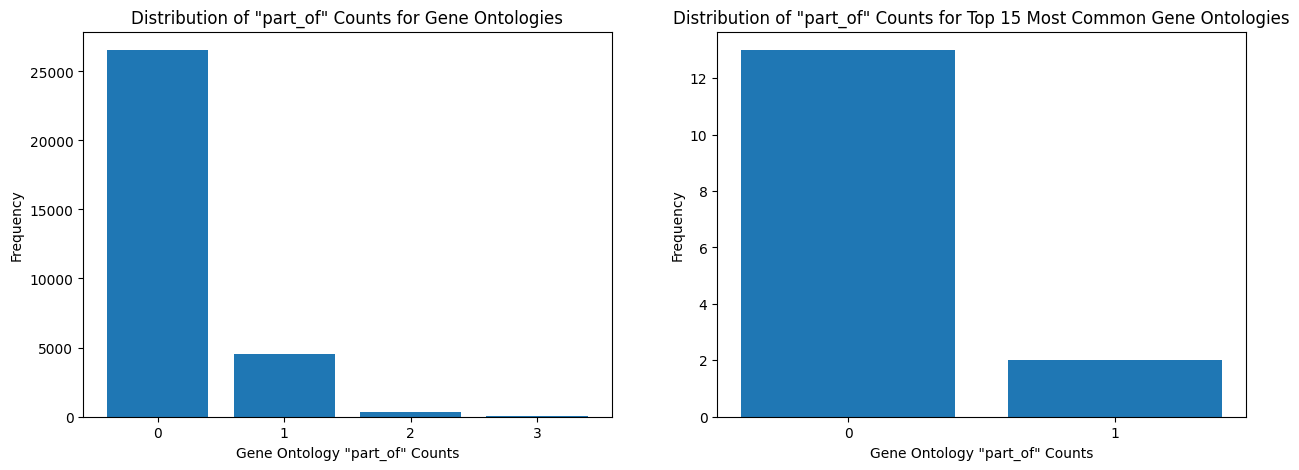

In [331]:
plt.figure(figsize = [15,5])
plt.subplot(1, 2, 1)
plt_count_bar(go_df, 'part_of')

plt.subplot(1, 2, 2)
plt_count_bar(common_go_df, 'part_of')
plt.title('Distribution of "part_of" Counts for Top 15 Most Common Gene Ontologies');

Gene ontologies look to have anywhere from 0-3 part_of relationships with other gene ontologies.
The distribution of gene ontology part_of counts is right skewed. The highest frequency is at 0 part_of relationships, over 5x the next highest frequency.
The frequency of gene ontologies with part_of relationships decay exponentially as the number of relationships increase.

When looking at the top 15 most common gene ontologies, they only have 0 or 1 part_of relationships. Again, following the trend of the rest of the gene ontologies, the majority of them have 0 part_of relationships.

##### What is the distribution of regulates_counts for gene ontologies? What is the distribution of regulates_counts for the top 15 most common gene ontologies?

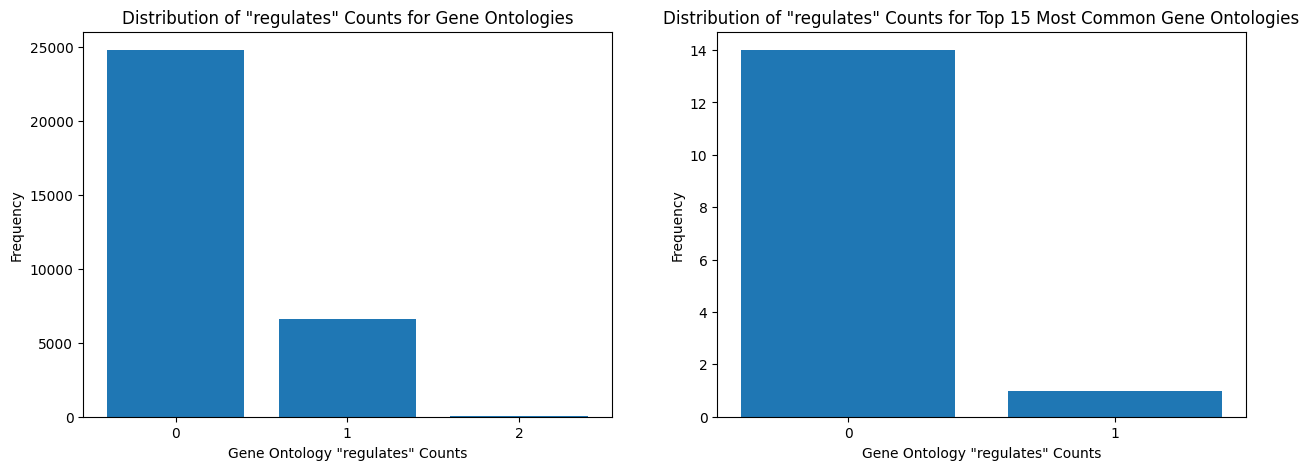

In [332]:
plt.figure(figsize = [15,5])
plt.subplot(1, 2, 1)
plt_count_bar(go_df, 'regulates')

plt.subplot(1, 2, 2)
plt_count_bar(common_go_df, 'regulates')
plt.title('Distribution of "regulates" Counts for Top 15 Most Common Gene Ontologies');

Gene ontologies look to have anywhere from 0-2 regulates relationships with other gene ontologies.
The distribution of gene ontology regulates counts is right skewed. The highest frequency is at 0 regulates relationships, roughly 4x the next highest frequency.
There are very few gene ontologies with 2 regulates relationships.

When looking at the top 15 most common gene ontologies, they only have 0 or 1 regulates relationships with a majority of them having 0 regulates relationships.

##### What are the most common protein IDs?

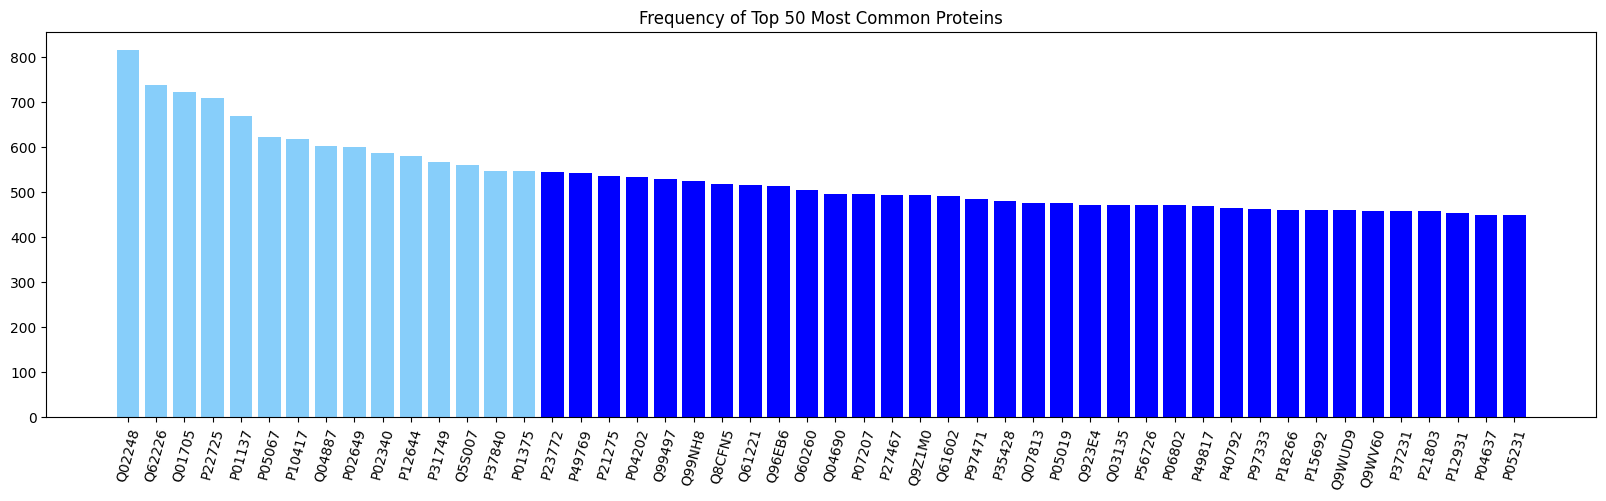

In [275]:
#get top 50 most common proteins
common_proteins = terms_df.EntryID.value_counts().head(50);
common_protein_IDs = common_proteins.index

#barchart of top 50 most common proteins
plt.figure(figsize=[20,5]);
common_bars = plt.bar(x=common_protein_IDs[0:15], height=common_proteins.values[0:15], color='lightskyblue');
less_common_bars = plt.bar(x=common_protein_IDs[15:], height=common_proteins.values[15:], color='blue')
plt.xticks(rotation=75);
plt.title('Frequency of Top 50 Most Common Proteins');

In [276]:
# get frequency of 1st most common protein,
#     frequency of 15th most common protein, &
#     proportion of data that these proteins make up
print(common_proteins.values[0])
print(common_proteins.values[15])
print(common_proteins.values[0:15].sum()/terms_df.shape[0])

815
543
0.0017657050524966802


There are a clear top 5 proteins, but we'll consider the top 15 most common proteins (as seen in light blue).
Each of the top proteins have anywhere from ~540 - 810 out of 31466 gene ontologies. Collectively, these top 15 proteins make up 0.1% of the data, so even though they are the most common, they make up a very small portion of the data.

##### What is the distribution of protein sequence length?

In [198]:
def plt_count_hist(df, col, num_bins, title_rel):
    min = df[col].min()
    max = df[col].max()
    bin_width = (max - min)/num_bins
    bins_x = np.arange(min, max+bin_width, bin_width)
    plt.hist(df[col], bins_x);
    plt.ylabel('Frequency');
    plt.xlabel(title_rel);
    plt.title('Distribution of {}'.format(title_rel));

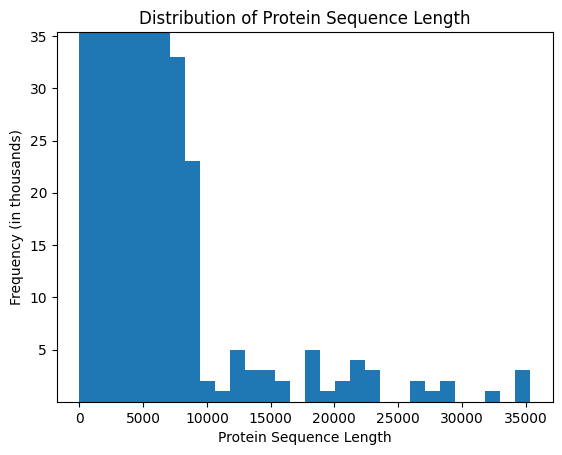

In [382]:
plt_count_hist(proteins_df, 'sequence_length', 30, 'Protein Sequence Length')
scale_factor = 1000
ymin = proteins_df['sequence_length'].min()
ymax = proteins_df['sequence_length'].max()
plt.ylim(ymin/scale_factor, ymax/scale_factor)
plt.ylabel('Frequency (in thousands)');

### Could potentially scale y-axis by dividing all values by 1000

In [376]:
ymax

35375

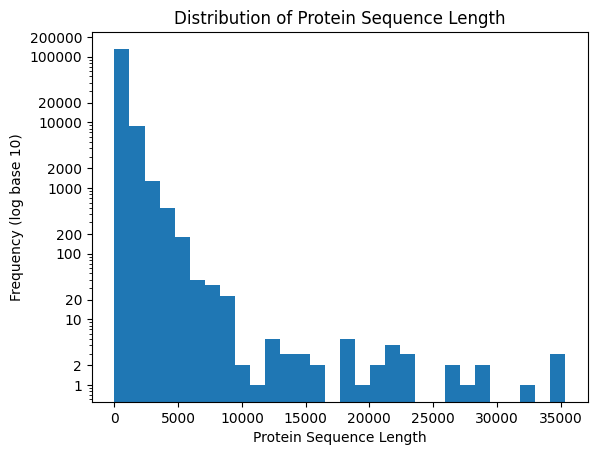

In [335]:
plt_count_hist(proteins_df, 'sequence_length', 30, 'Protein Sequence Length');
plt.yscale('log');
plt.yticks([1, 2, 10, 20, 100, 200, 1000, 2000, 10000, 20000, 100000, 200000],
           [1, 2, 10, 20, 100, 200, 1000, 2000, 10000, 20000, 100000, 200000]);
plt.ylabel('Frequency (log base 10)');

Protein sequence lengths are very much skewed to the right. The majority of the sequence lengths lie between 0-5000 amino acids.
The bin with the highest frequency are proteins with sequence lengths between 0 and 1200.

##### What is the distribution of protein gene ontologies counts?

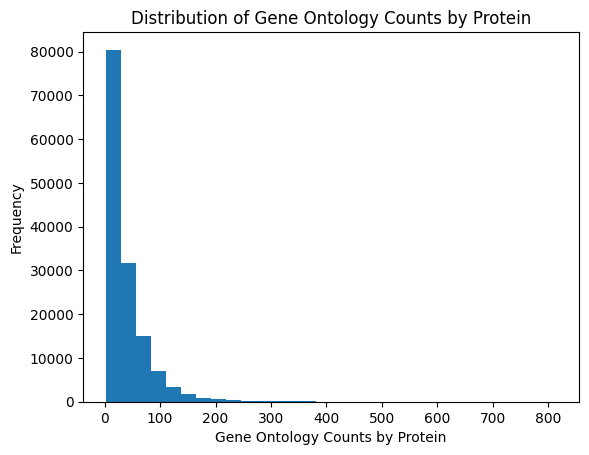

In [336]:
plt_count_hist(proteins_df, 'term_count', 30, 'Gene Ontology Counts by Protein');

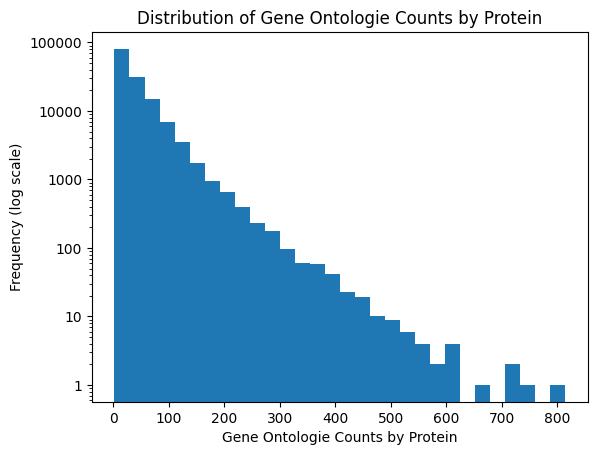

In [200]:
plt_count_hist(proteins_df, 'term_count', 30, 'Gene Ontology Counts by Protein');
plt.yscale('log');
plt.yticks([1, 10, 100, 1000, 10000, 100000],
           [1, 10, 100, 1000, 10000, 100000]);
plt.ylabel('Frequency (log scale)');

Proteins gene ontology counts are very much skewed to the right. The majority of the proteins have between 0-100 gene ontologies associated with them.
The bin with the highest frequency are proteins with 0-30 gene ontologies.

##### What is the distribution of amino counts for proteins?

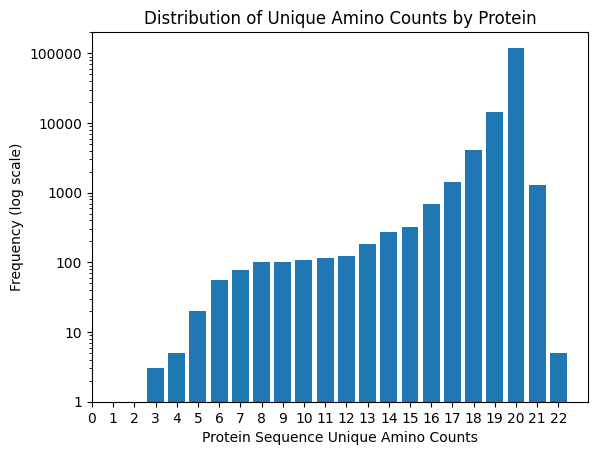

In [203]:
plt_count_bar(proteins_df, 'amino')
plt.yscale('log');
plt.yticks([1, 10, 100, 1000, 10000, 100000],
           [1, 10, 100, 1000, 10000, 100000]);
plt.ylabel('Frequency (log scale)');
plt.xlabel('Protein Sequence Unique Amino Counts');
plt.title('Distribution of Unique Amino Counts by Protein');

Protein Sequence unique amino acid counts are very much skewed to the left. The majority of the proteins have between 18-20 unique amino acids in thier protein sequence. The bin with the highest frequency are proteins with 20 unique amino acids.


## Univariate Conclusion
#### Gene Ontologies
The top 15 most common gene ontologies are associated with 18% of the protein/gene ontology relationships. They are individually associated with anywhere from ~34,000 - 93,000 out of 142246 proteins.

BPO is the most common subotonology, making up 63% of the gene ontologies then MFO, and CCO. When you subset the data to look at only the top 15 most common gene ontologies, CCO is actually the most common subontology at 50%.

Gene ontologies look to have anywhere from 0-10 is_a relationships, 0-3 part_of relationships, and 0-2 regulates relationships with other gene ontologies. 
All distributions are right skewed with their highest frequencies at either 0 or 1.

#### Proteins
The top 15 most common proteins have anywhere from ~540 - 810 out of 31466 gene ontologies. Collectively, these top 15 proteins appear in 0.1% of the data, a very small portion of the data.

Protein sequence lengths & gene ontology counts are very much skewed to the right. The majority of the sequence lengths lie between 0-5000 amino acids. The majority of the proteins have between 0-100 gene ontologies associated with them. 

On the other hand, protein sequence unique amino acid counts are very much skewed to the left. The majority of the proteins have between 18-20 unique amino acids in thier protein sequence.

In [325]:
proteins_df.head()

,EntryID,description,sequence,taxonomyID,sequence_length,term_count,amino_count,BPO_prop,CCO_prop,MFO_prop
0,P20536,P20536 sp|P20536|UNG_VACCC Uracil-DNA glycosyl...,"(M, N, S, V, T, V, S, H, A, P, Y, T, I, T, Y, ...",10249,218,33,20,0.909091,0.000000,0.090909
1,O73864,O73864 sp|O73864|WNT11_DANRE Protein Wnt-11 OS...,"(M, T, E, Y, R, N, F, L, L, L, F, I, T, S, L, ...",7955,354,170,20,0.941176,0.029412,0.029412
2,O95231,O95231 sp|O95231|VENTX_HUMAN Homeobox protein ...,"(M, R, L, S, S, S, P, P, R, G, P, Q, Q, L, S, ...",9606,258,62,20,0.548387,0.209677,0.241935
3,A0A0B4J1F4,A0A0B4J1F4 sp|A0A0B4J1F4|ARRD4_MOUSE Arrestin ...,"(M, G, G, E, A, G, A, D, G, P, R, G, R, V, K, ...",10090,415,45,20,0.622222,0.266667,0.111111
4,P54366,P54366 sp|P54366|GSC_DROME Homeobox protein go...,"(M, V, E, T, N, S, P, P, A, G, Y, T, L, K, R, ...",7227,415,20,20,0.000000,0.400000,0.600000


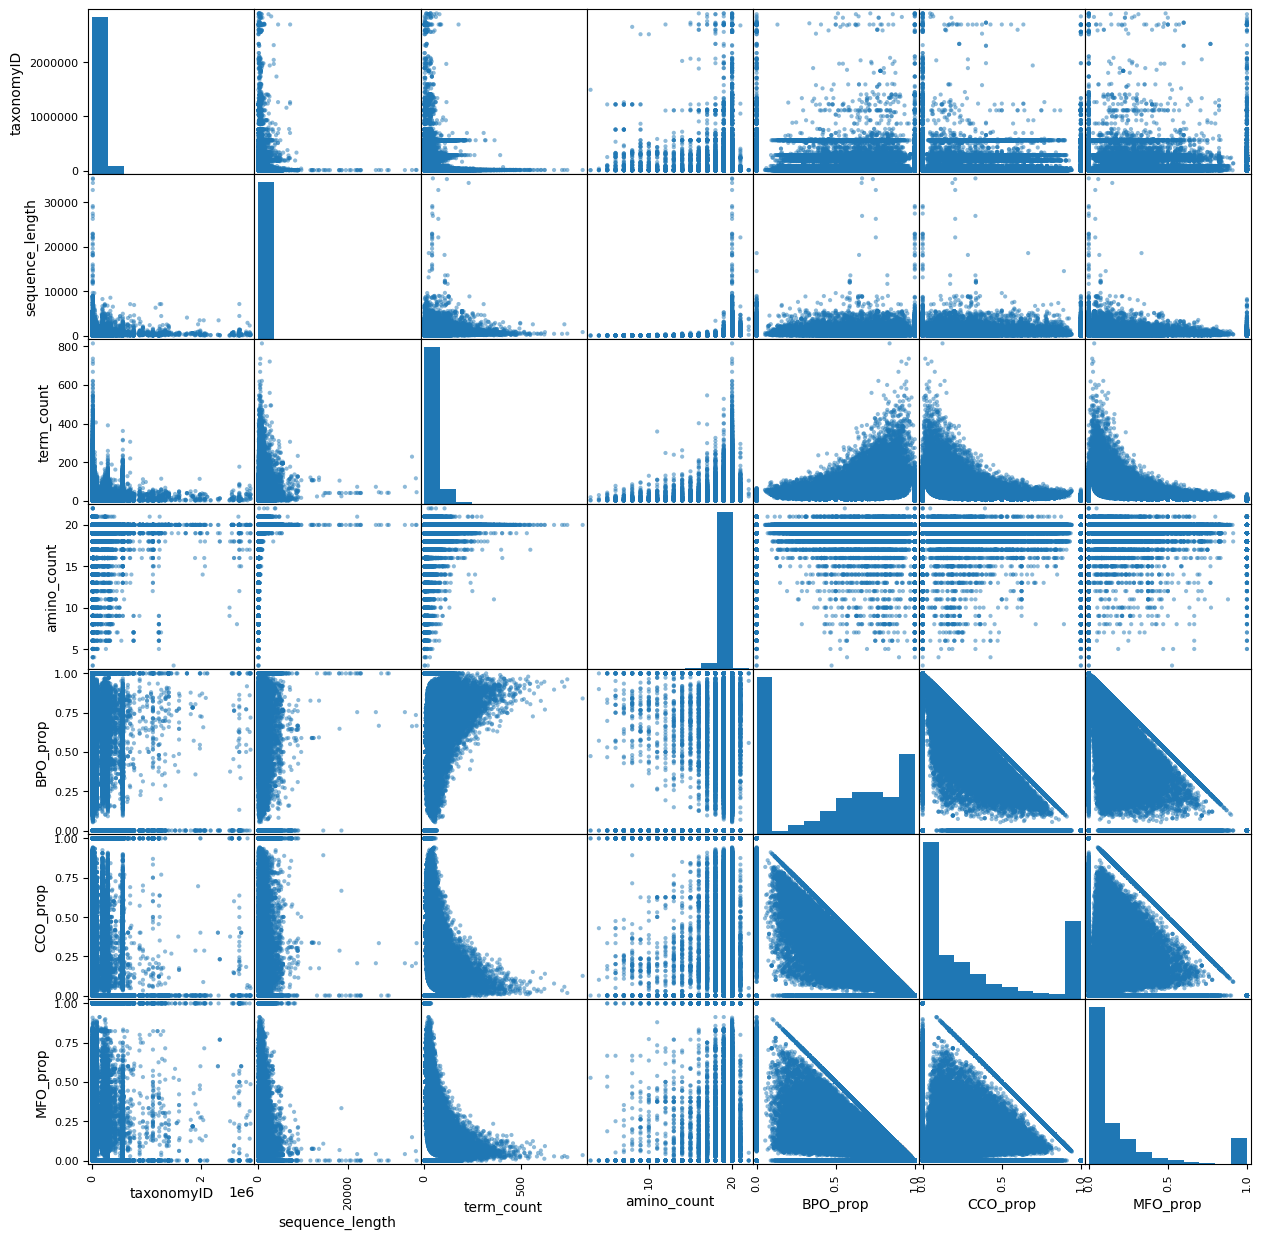

In [324]:
pd.plotting.scatter_matrix(proteins_df, figsize=[15,15]);
#df.plot(x='column1_1, y= 'column’_2, kind = 'scatter');
#df[‘column’].plot(kind = 'box');